## Alzheimers Disease Clasification of 6 Classes

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

import cv2
from tqdm import tqdm
import io
import seaborn as sns

from sklearn.utils import shuffle # Shuffle arrays or sparse matrices in a consistent way
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import DenseNet121
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard,ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



import ipywidgets as widgets
from PIL import Image
from IPython.display import display, clear_output

In [5]:
labels = ['AD','CN','MCI','LMCI','EMCI','SMC']

In [6]:
X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=150

for i in labels:
    folderPath = os.path.join(r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train', i)
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join(r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train', i) # Join two or more pathname components
    for j in tqdm(os.listdir(folderPath)):
        image = cv2.imread(os.path.join(folderPath, j))
        image = cv2.resize(image, (image_size, image_size))
        X_train.append(image)
        Y_train.append(i)
        
# converted into array

Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

100%|████████████████████████████████████████████████████████████████████████████████| 68/68 [00:00<00:00, 4420.53it/s]


In [7]:
Xtrain.shape

(994, 150, 150, 3)

In [8]:
Ytrain.shape

(994,)

In [9]:
Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=42)

## Train test split which is divided train dataset and validation dataset

In [10]:
xtrain,xtest, Ytrain,ytest = train_test_split(Xtrain, Ytrain,test_size=0.1
                                              , random_state=42)

In [11]:
xtrain.shape

(894, 150, 150, 3)

In [12]:
Ytrain.shape

(894,)

In [13]:
xtest.shape

(100, 150, 150, 3)

## Converting labels into One hot encoder

In [14]:
ytrain_new = []
ytest_new = []

for i in Ytrain:
    ytrain_new.append(labels.index(i))
ytrain = to_categorical(ytrain_new) 

for i in ytest:
    ytest_new.append(labels.index(i))

ytest = to_categorical(ytest_new)

In [15]:
ytrain.shape

(894, 6)

In [16]:
ytest.shape

(100, 6)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
# Set your image dimensions and other parameters
img_width, img_height = 150, 150  # Adjust as needed
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 10

# Data augmentation to improve generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Set your dataset paths
train_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\test'

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),  # Adjusted target size
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),  # Adjusted target size
    batch_size=batch_size,
    class_mode='categorical')

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes, adjust as needed


Found 497 images belonging to 6 classes.
Found 82 images belonging to 6 classes.




In [18]:
from keras.preprocessing.image import ImageDataGenerator
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Table(
    header=dict(values=["Layer (type)", "Output Shape", "Param #"]),
    cells=dict(values=[["Input Layer"] + [f"Conv2D-{i}" for i in range(4)] + ["Flatten", "Dense", "Dropout", "Output Layer"],
                       [model.layers[i].output_shape[1:] for i in range(len(model.layers))],
                       [model.layers[i].count_params() for i in range(len(model.layers))]])))

# Update the layout
fig.update_layout(title="Model Architecture")

# Save the figure
fig.write_html("model_architecture_plotly.html")
html_file_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\model_architecture_plotly.html'

# Save the figure as an HTML file
fig.write_html(html_file_path)

# Print a message indicating where the file was saved
print(f"Model architecture visualization saved to: {html_file_path}")

Model architecture visualization saved to: D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\model_architecture_plotly.html


In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [20]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]
model.compile( optimizer='adam',
    loss='categorical_crossentropy',
    metrics=METRICS)

In [21]:
tensorBoard = TensorBoard(log_dir="logs")
checkPoint = ModelCheckpoint("model_d.h5",
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                             factor=0.3,
                             patience=2,
                             verbose=1,
                             mode='auto',
                            min_delta=0.001)

## Fit the Model

In [22]:
print("Xtrain shape:", xtrain.shape)
print("Ytrain shape:", ytrain.shape)



Xtrain shape: (894, 150, 150, 3)
Ytrain shape: (894, 6)


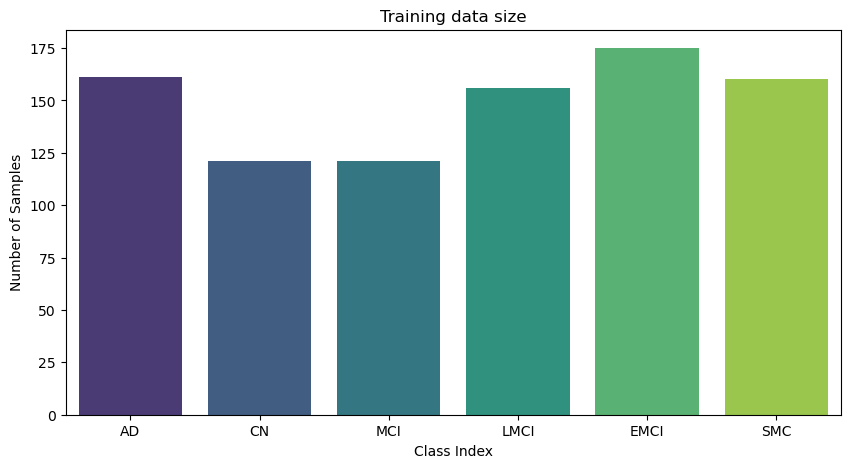

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(x=Ytrain, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()


In [23]:
    history=model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_split=0.3)

Epoch 1/20

20/20 [==============================] - 9s 330ms/step - loss: 9.7532 - accuracy: 0.8005 - precision: 0.1639 - recall: 0.0480 - auc: 0.5345 - val_loss: 1.7010 - val_accuracy: 0.8333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6434
Epoch 2/20
20/20 [==============================] - 6s 314ms/step - loss: 1.6149 - accuracy: 0.8347 - precision: 0.5806 - recall: 0.0288 - auc: 0.7012 - val_loss: 1.4481 - val_accuracy: 0.8383 - val_precision: 0.7222 - val_recall: 0.0483 - val_auc: 0.7951
Epoch 3/20
20/20 [==============================] - 6s 317ms/step - loss: 1.3900 - accuracy: 0.8467 - precision: 0.6344 - recall: 0.1888 - auc: 0.7947 - val_loss: 1.4478 - val_accuracy: 0.8488 - val_precision: 0.6866 - val_recall: 0.1710 - val_auc: 0.7818
Epoch 4/20
20/20 [==============================] - 6s 310ms/step - loss: 1.2640 - accuracy: 0.8597 - precision: 0.6988 - recall: 0.2784 - auc: 0.8345 - val_loss: 1.1564 - val_accuracy: 0.8767 - val_precision: 0.8804 - val_

In [24]:
ev = model.predict(xtest)

4/4 [==============================] - 0s 72ms/step


4/4 [==============================] - 0s 70ms/step


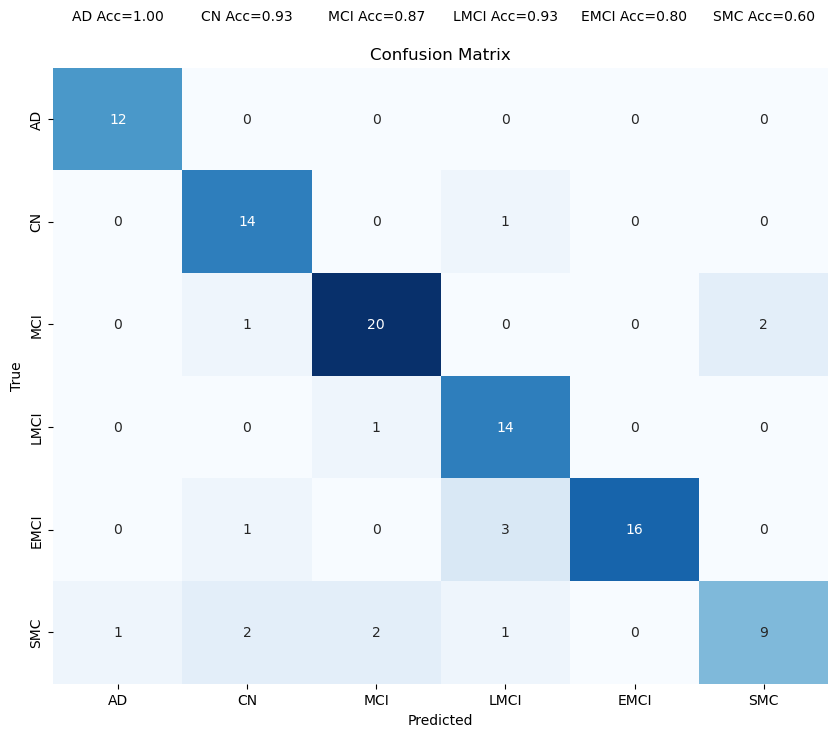

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is a list of class labels
labels =  ['AD','CN','MCI','LMCI','EMCI','SMC']

# Assuming 'xtest' and 'ytest' are your test data and labels
pred = model.predict(xtest)
pred = np.argmax(pred, axis=1)
actual_label = np.argmax(ytest, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(actual_label, pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)

# Calculate and display per-class accuracy below the x-axis
per_class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
for i, label in enumerate(labels):
    plt.text(i + 0.5, -0.5, f'{label} Acc={per_class_accuracy[i]:.2f}', color='black', ha='center', va='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Loss and Accuracy Measurement graph

In [26]:
def accuracy_and_loss_Plot(modelData):
    
    fig=plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--',label='accuracy')
    plt.plot(modelData.history["val_accuracy"],'ro--',label='val_accuracy')
    plt.title("Training Data Accuracy Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    #plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--',label='loss')
    plt.plot(modelData.history["val_loss"],'ro--',label='val_loss')
    plt.title("Training Data Loss Measurements")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    #plt.grid()
    plt.legend()
    plt.tight_layout()

C:\Users\HP\AppData\Local\Temp\ipykernel_24512\2046531637.py:23: UserWarning:

The figure layout has changed to tight



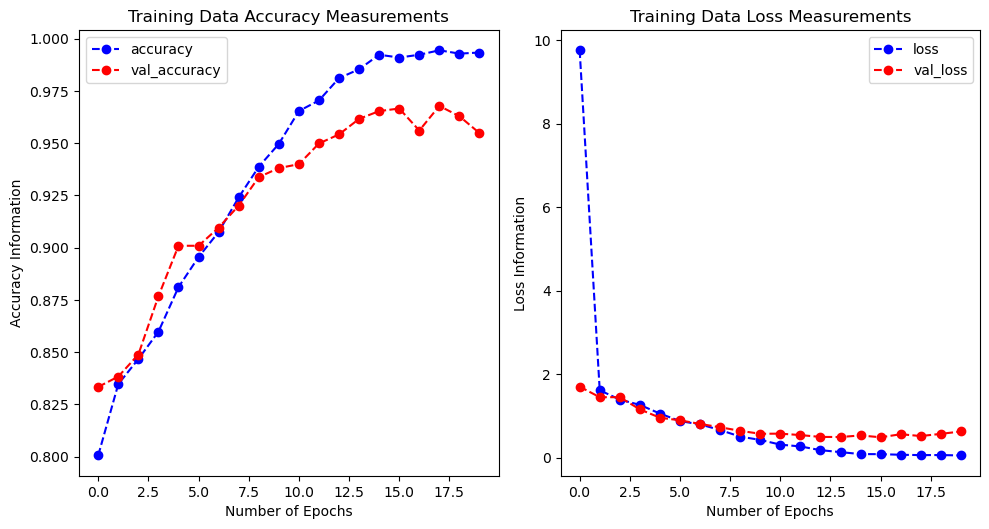

In [27]:
accuracy_and_loss_Plot(history)

## Random forest Classification

100%|████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1299.18it/s]


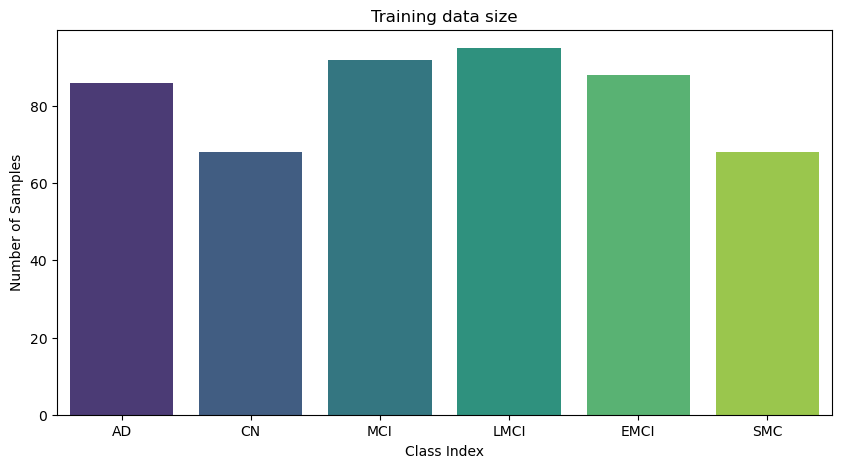

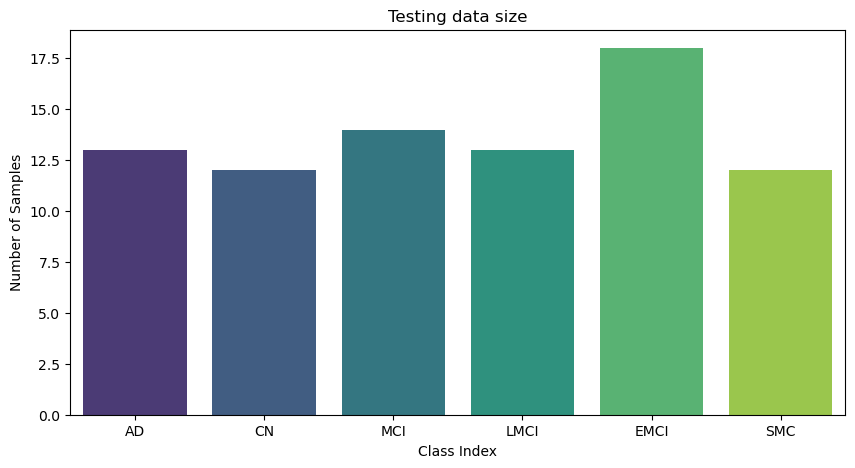

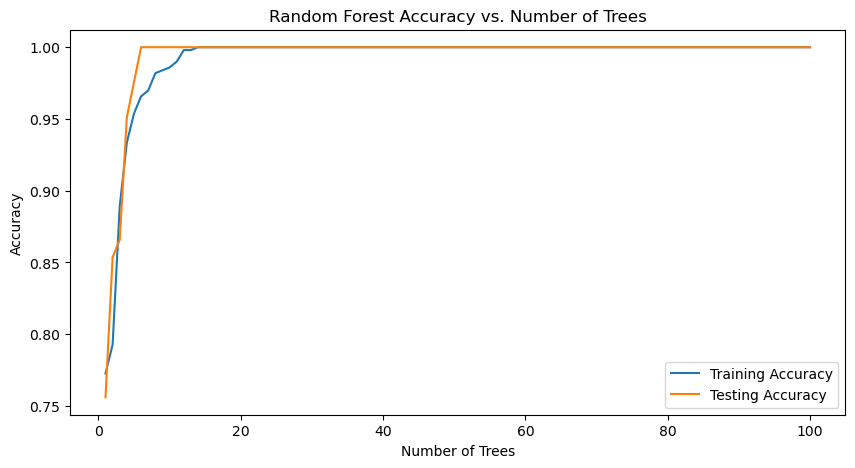

Accuracy: 1.0


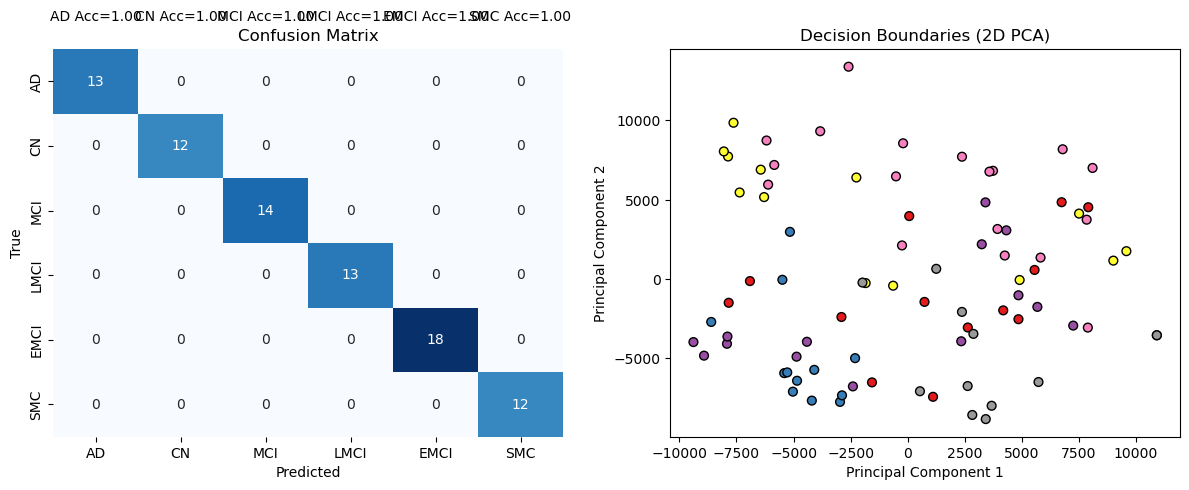

In [1]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import seaborn as sns

# Set the paths to your training and testing data
train_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\test'

# Define your class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []
    for label_index, label in enumerate(class_labels):
        label_path = os.path.join(folder_path, label)
        for filename in tqdm(os.listdir(label_path)):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 150))  # Adjust the size as needed
            images.append(img.flatten())  # Flatten the image
            labels.append(label_index)
    return np.array(images), np.array(labels)

# Load training data
X_train, y_train = load_images(train_data_path)

# Load testing data
X_test, y_test = load_images(test_data_path)

# Visualize input data size with a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Testing data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()

# Initialize Random Forest classifier with regularization parameters
rf_classifier = RandomForestClassifier(n_estimators=100, 
                                       random_state=42,
                                       max_depth=10,          # Maximum depth of each tree
                                       min_samples_split=2,   # Minimum samples required to split an internal node
                                       min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
                                       max_features='sqrt')   # Number of features to consider when looking for the best split

# Train the classifier and monitor accuracy during training
train_accuracies = []
test_accuracies = []

for n_trees in range(1, 101):
    # Train the classifier with n_trees
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluate on training set
    y_train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    y_test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot accuracy over the number of trees
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 101), test_accuracies, label='Testing Accuracy')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final model with optimal number of trees
rf_classifier = RandomForestClassifier(n_estimators=np.argmax(test_accuracies) + 1, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(12, 5))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Per-Class Accuracy Plot
per_class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
for i, label in enumerate(class_labels):
    plt.text(i + 0.5, -0.5, f'{label} Acc={per_class_accuracy[i]:.2f}', color='black', ha='center', va='center')

# Decision Boundaries Plot using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
Z = rf_classifier.predict(X_test)
Z = Z.reshape(X_test_pca[:, 0].shape)

# Plotting Decision Boundaries
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Z, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title('Decision Boundaries (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


## SVM

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 1338.79it/s]


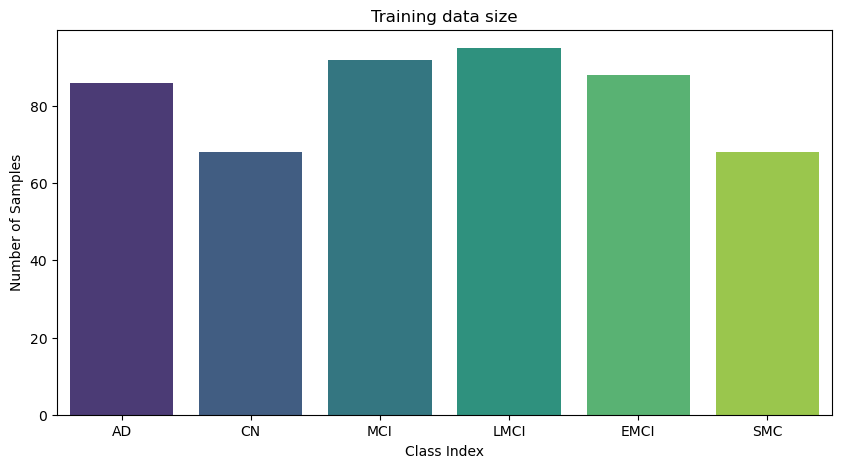

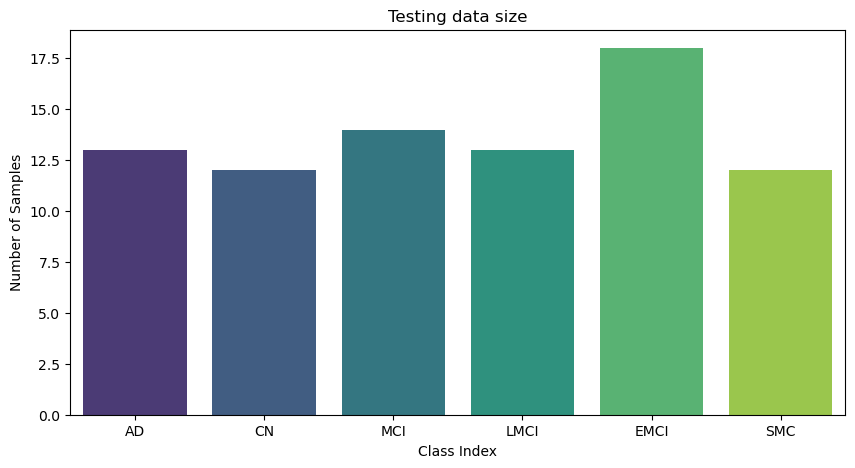

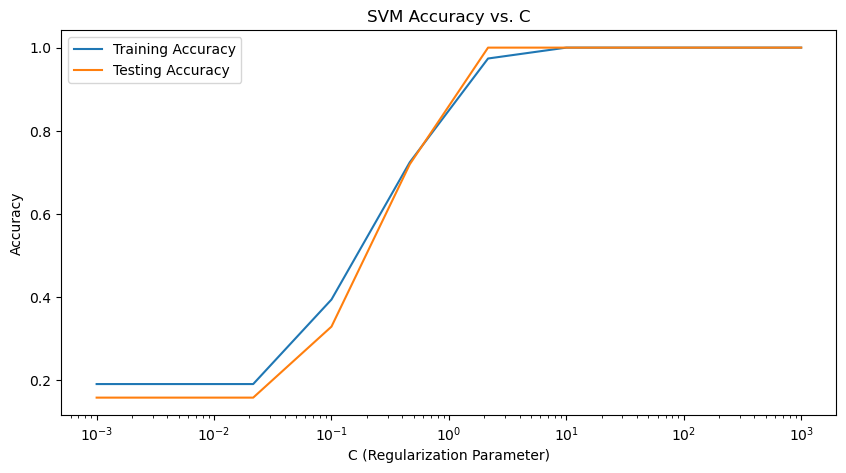

SVM Accuracy: 1.0


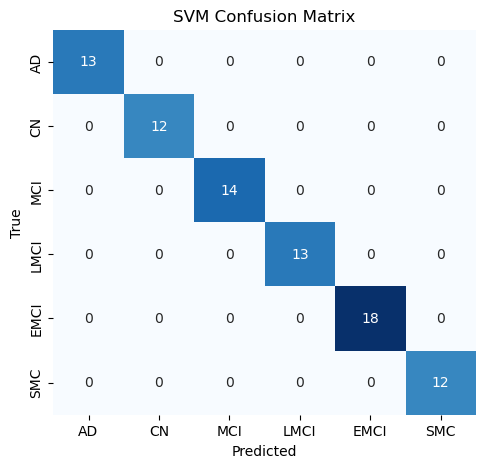

In [3]:
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Set the paths to your training and testing data
train_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\train'
test_data_path = r'D:\FYP_SOFTWARE 2023\FYP_SOFTWARE 2023\CODE AND DATASETS\test'

# Define your class labels
class_labels = ['AD', 'CN', 'MCI', 'LMCI', 'EMCI', 'SMC']

# Function to load and preprocess images
def load_images(folder_path):
    images = []
    labels = []
    for label_index, label in enumerate(class_labels):
        label_path = os.path.join(folder_path, label)
        for filename in tqdm(os.listdir(label_path)):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (150, 150))  # Adjust the size as needed
            images.append(img.flatten())  # Flatten the image
            labels.append(label_index)
    return np.array(images), np.array(labels)

# Load training data
X_train, y_train = load_images(train_data_path)

# Load testing data
X_test, y_test = load_images(test_data_path)

# Visualize input data size with a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Training data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, palette='viridis')
plt.title('Testing data size')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.show()

# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier and monitor accuracy during training
train_accuracies = []
test_accuracies = []

for C_value in np.logspace(-3, 3, 10):
    # Train the classifier with different C values
    svm = SVC(kernel='rbf', C=C_value, gamma='scale', random_state=42)
    svm.fit(X_train, y_train)
    
    # Evaluate on training set
    y_train_pred = svm.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    y_test_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot accuracy over different values of C
plt.figure(figsize=(10, 5))
plt.semilogx(np.logspace(-3, 3, 10), train_accuracies, label='Training Accuracy')
plt.semilogx(np.logspace(-3, 3, 10), test_accuracies, label='Testing Accuracy')
plt.title('SVM Accuracy vs. C')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final model with optimal C value
optimal_C = np.logspace(-3, 3, 10)[np.argmax(test_accuracies)]
svm_classifier = SVC(kernel='rbf', C=optimal_C, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(12, 5))

# Confusion Matrix Plot
plt.subplot(1, 2, 1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')

# Per-Class Accuracy Plot
per_class_accuracy_svm = np.diag(cm_svm) / np.sum(cm_svm)
